In [4]:
import numpy as np

In [5]:
def load_glove_model(glove_file):
    """Load the GloVe model from a file."""
    print("Loading GloVe Model")
    with open(glove_file, 'r') as file:
        model = {}
        for line in file:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
        print("Done. {} words loaded!".format(len(model)))
    return model

glove_model = load_glove_model("/Users/divyamsobti/Downloads/glove.6B/glove.6B.100d.txt")


Loading GloVe Model
Done. 400000 words loaded!


In [6]:
def sentence_vector(sentence, model):
    """Generate a sentence vector by averaging the word vectors."""
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(100)  # Assuming each word vector has 100 dimensions
    return np.mean(word_vectors, axis=0)

# Example sentences
sentences = ["This is a sentence.", "Here is another one.","Here is other one.","Her", "Her is other one.", "please clean me", "asdmaskdasd"]
sentence_vectors = np.array([sentence_vector(sentence, glove_model) for sentence in sentences])


In [7]:
from sklearn.cluster import KMeans

num_clusters = 3  # Example number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(sentence_vectors)
labels = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


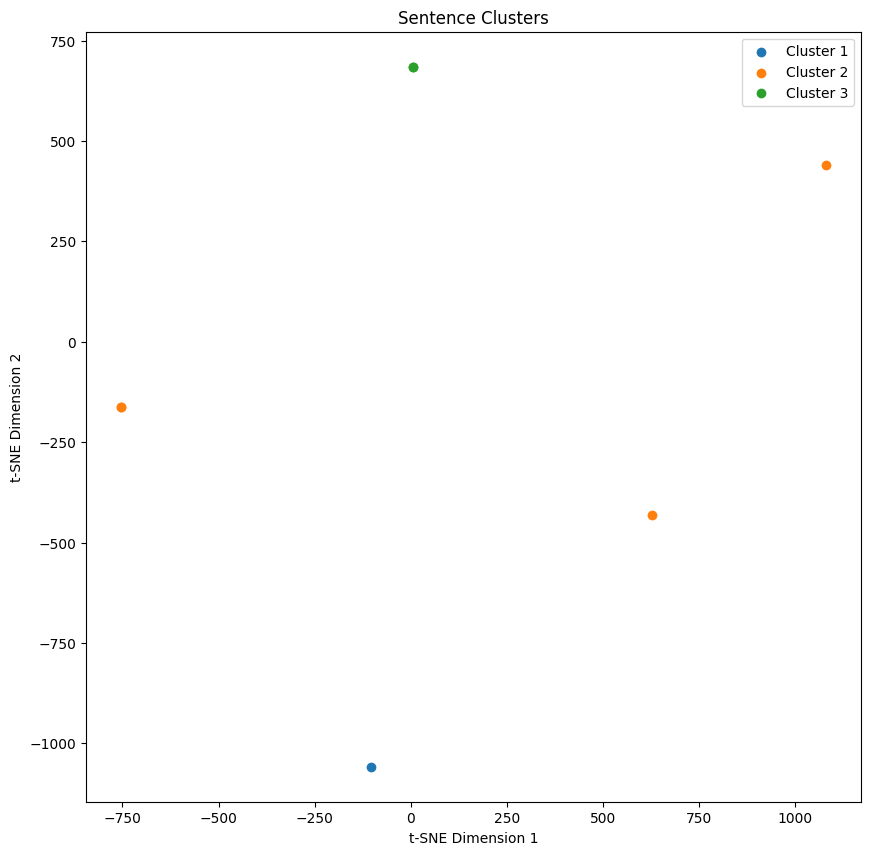

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction for 2D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value,random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

# Plotting
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    indices = labels == i
    plt.scatter(reduced_vectors_2d[indices, 0], reduced_vectors_2d[indices, 1], label=f'Cluster {i+1}')
plt.title('Sentence Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [6]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


In [7]:
from sklearn.decomposition import PCA

# Performing PCA to reduce to 3 dimensions for visualization
pca = PCA(n_components=3)
word_vectors_pca = pca.fit_transform(sentence_vectors)


In [8]:
import plotly.graph_objects as go
import pandas as pd

# Create a DataFrame for the PCA reduced data
df = pd.DataFrame({
    'x': word_vectors_pca[:, 0],
    'y': word_vectors_pca[:, 1],
    'z': word_vectors_pca[:, 2],
    'label': labels  # Assuming labels is a list of labels for each word vector
})

# Create the scatter plot with Plotly
fig = go.Figure()

for label in df['label'].unique():
    label_df = df[df['label'] == label]
    fig.add_trace(go.Scatter3d(
        x=label_df['x'], 
        y=label_df['y'], 
        z=label_df['z'],
        mode='markers',
        name=f'Label {label}',
        text=label_df['label'],  # Hover text
        marker=dict(
            size=5,
            opacity=0.8
        )
    ))

# Update layout
fig.update_layout(
    title='PCA Visualization of Word Vectors',
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()


In [9]:
from sklearn.decomposition import PCA

# Performing PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(sentence_vectors)

import plotly.express as px
import pandas as pd

# Create a DataFrame for the PCA reduced data
df = pd.DataFrame({
    'x': word_vectors_pca[:, 0],
    'y': word_vectors_pca[:, 1],
    'label': labels  # Assuming labels is a list of labels for each word vector
})

# Create the scatter plot with Plotly
fig = px.scatter(df, x='x', y='y', color='label', hover_data=['label'])

# Update layout
fig.update_layout(
    title='PCA Visualization of Word Vectors in 2D',
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()



In [8]:
import pandas as pd
import numpy as np

In [10]:
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")
# amazon=pd.read_csv("Manual Content Analysis.csv")
# amazon=pd.read_csv("amazon_pos.csv")

In [13]:
amazon_neg=pd.read_csv("amazon_neg.csv")
amazon_pos=pd.read_csv("amazon_pos.csv")

In [25]:
amazon=amazon.drop(columns=['Keyword','Original_aspect','Product Link','Review Star','Sentiment'])

In [11]:
amazon

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use
...,...,...
1176,top no longer stays on.,Performance
1177,unfortunately one of the lids does not fit at all,Performance
1178,"cheap enough that if my husband loses one, we ...",Price
1179,economical price,Price


In [22]:
# amazon=amazon.combine_first(amazon_neg)

In [12]:
# m=amazon['Review']
m=amazon['Reviews']

In [13]:
# combime m with amazon_neg
amazon

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use
...,...,...
1176,top no longer stays on.,Performance
1177,unfortunately one of the lids does not fit at all,Performance
1178,"cheap enough that if my husband loses one, we ...",Price
1179,economical price,Price


In [14]:
q=amazon['Aspect']

In [15]:
all_values = q.str.split(',').explode()


In [66]:
all_values

0       adaptability
1       adaptability
2         durability
3           ease use
4           ease use
            ...     
1176     performance
1177     performance
1178           price
1179           price
1180          safety
Name: Aspect, Length: 1181, dtype: object

In [16]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    processed_text = " ".join(filtered_tokens)

    
    return processed_text

In [17]:
processed_series = m.apply(preprocess_text)

['settings', 'perfect', 'hair', 'types']
['lots', 'settings']
['heating', 'element', 'died']
['also', 'diffuser', 'stay']
['wo', 'stay', 'flys', 'see', 'one', 'work']
['complaint', 'concentrator', 'fit', 'perfectly', 'pop', 'middle', 'everything']
['burns', 'clients', 'medium', 'setting']
['also', 'diffuser', 'stay']
['wo', 'stay', 'flys', 'see', 'one', 'work']
['get', 'hot', 'sweaty', 'either']
['complaint', 'concentrator', 'fit', 'perfectly', 'pop', 'middle', 'everything']
['oh', 'hair', 'frizzy', 'either', 'best', 'beauty', 'purchase', 'ever', 'made']
['quiet', 'make', 'feel', 'like', 'standing', 'next', 'jet', 'engine']
['without', 'frizz']
['wo', 'stay', 'flys', 'see', 'one', 'work']
['best', 'dryer', 'ever', 'bought']
['get', 'hot', 'enough', 'low', 'setting']
['complaint', 'concentrator', 'fit', 'perfectly', 'pop', 'middle', 'everything']
['dryer', 'excellent']
['great', 'hair']
['way', 'effective', 'ones', 'used']
['dries', 'hair', 'quickly']
['dries', 'medium', 'length', 'hair

In [18]:
all_values=all_values.apply(preprocess_text)

['adaptability']
['adaptability']
['durability']
['ease', 'use']
['ease', 'use']
['ease', 'use']
['ergonomics']
['interference']
['interference']
['interference']
['interference']
['interference']
['interference']
['interference']
['performance']
['performance']
['performance']
['performance']
['performance']
['performance']
['performance']
['use', 'efficiency']
['use', 'efficiency']
['use', 'efficiency']
['use', 'efficiency']
['use', 'efficiency']
['aesthetics']
['aesthetics']
['durability']
['ease', 'reprocessing']
['ease', 'reprocessing']
['ease', 'reprocessing']
['ease', 'reprocessing']
['ease', 'reprocessing']
['ease', 'storage']
['ease', 'storage']
['ease', 'use']
['ease', 'use']
['ease', 'use']
['ease', 'use']
['interference']
['performance']
['performance']
['performance']
['performance']
['adaptability']
['adaptability']
['adaptability']
['aesthetics']
['aesthetics']
['aesthetics']
['durability']
['ease', 'reprocessing']
['ease', 'reprocessing']
['ease', 'reprocessing']
['ease

In [19]:
unique_values = all_values.unique()
len_aspect=len(unique_values)

In [20]:
len_aspect

12

In [21]:
unique_values

array(['adaptability', 'durability', 'ease use', 'ergonomics',
       'interference', 'performance', 'use efficiency', 'aesthetics',
       'ease reprocessing', 'ease storage', 'price', 'safety'],
      dtype=object)

In [22]:
processed_series

0                             settings perfect hair types
1                                           lots settings
2                                    heating element died
3                                      also diffuser stay
4                               wo stay flys see one work
                              ...                        
1176                                     top longer stays
1177                           unfortunately one lids fit
1178                cheap enough husband loses one wo cry
1179                                     economical price
1180    also way seal drinking hole car hit bump stop ...
Name: Reviews, Length: 1181, dtype: object

In [23]:
def sentence_vector(sentence, model):
    """Generate a sentence vector by averaging the word vectors."""
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(100)  # Assuming each word vector has 100 dimensions
    return np.mean(word_vectors, axis=0)

In [24]:
type(processed_series)

pandas.core.series.Series

In [25]:
sentences=np.array(processed_series)

In [26]:
type(sentences)

numpy.ndarray

In [27]:
sentence_vectors = np.array([sentence_vector(sentence, glove_model) for sentence in processed_series])

In [35]:
from sklearn.cluster import KMeans

num_clusters = len_aspect  # Example number of clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(sentence_vectors)
labels_6 = kmeans.fit_predict(sentence_vectors)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
from sklearn.cluster import KMeans

num_clusters = len_aspect  # Example number of clusters
kmeans = KMeans(n_clusters=12)
kmeans.fit(sentence_vectors)
labels_12 = kmeans.fit_predict(sentence_vectors)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
df_12 = pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels_12
})

# Show the DataFrame
print(df_12)

                                               Sentence  Cluster
0                           settings perfect hair types        2
1                                         lots settings        2
2                                  heating element died        2
3                                    also diffuser stay        3
4                             wo stay flys see one work        3
...                                                 ...      ...
1176                                   top longer stays        3
1177                         unfortunately one lids fit        2
1178              cheap enough husband loses one wo cry        1
1179                                   economical price       10
1180  also way seal drinking hole car hit bump stop ...        3

[1181 rows x 2 columns]


In [38]:
df_6= pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels_6
})

# Show the DataFrame
print(df_6)

                                               Sentence  Cluster
0                           settings perfect hair types        4
1                                         lots settings        4
2                                  heating element died        4
3                                    also diffuser stay        4
4                             wo stay flys see one work        2
...                                                 ...      ...
1176                                   top longer stays        2
1177                         unfortunately one lids fit        4
1178              cheap enough husband loses one wo cry        2
1179                                   economical price        2
1180  also way seal drinking hole car hit bump stop ...        4

[1181 rows x 2 columns]


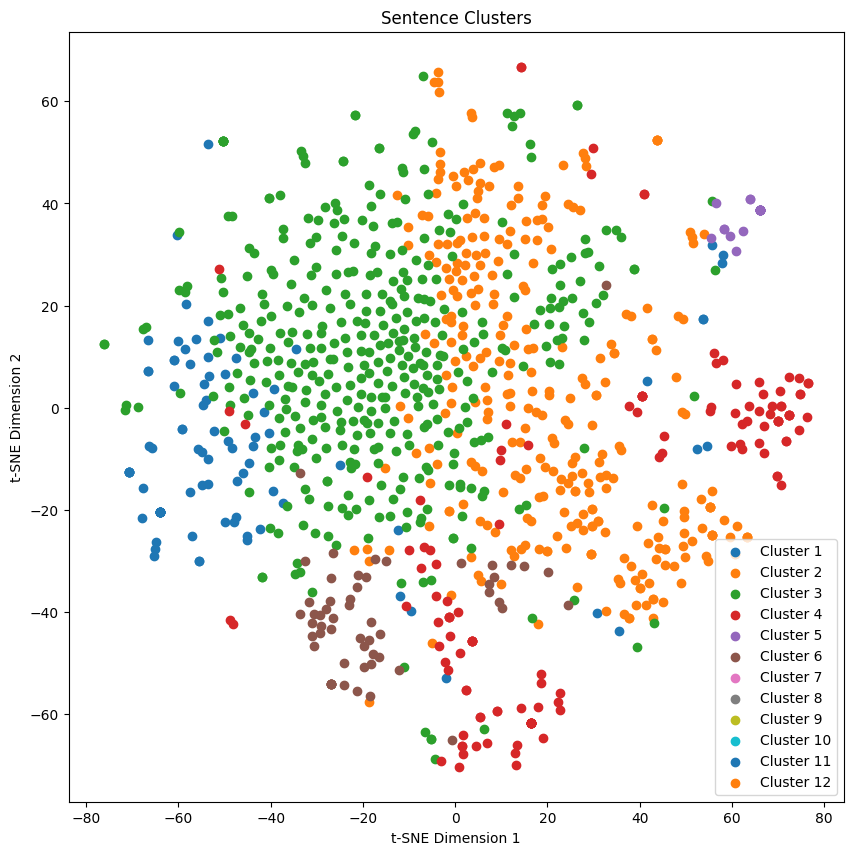

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction for 2D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value,random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

# Plotting
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    indices = labels == i
    plt.scatter(reduced_vectors_2d[indices, 0], reduced_vectors_2d[indices, 1], label=f'Cluster {i+1}')
plt.title('Sentence Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [24]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


In [40]:
from sklearn.mixture import GaussianMixture

In [44]:
gmm = GaussianMixture(n_components = 6)
gmm_12 = GaussianMixture(n_components = 12)

In [45]:
gmm.fit(sentence_vectors)
gmm_12.fit(sentence_vectors)

GaussianMixture(n_components=12)

In [46]:
labels_6_gmm = gmm.predict(sentence_vectors)
labels_12_gmm = gmm_12.predict(sentence_vectors)

In [130]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction for 2D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value,random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

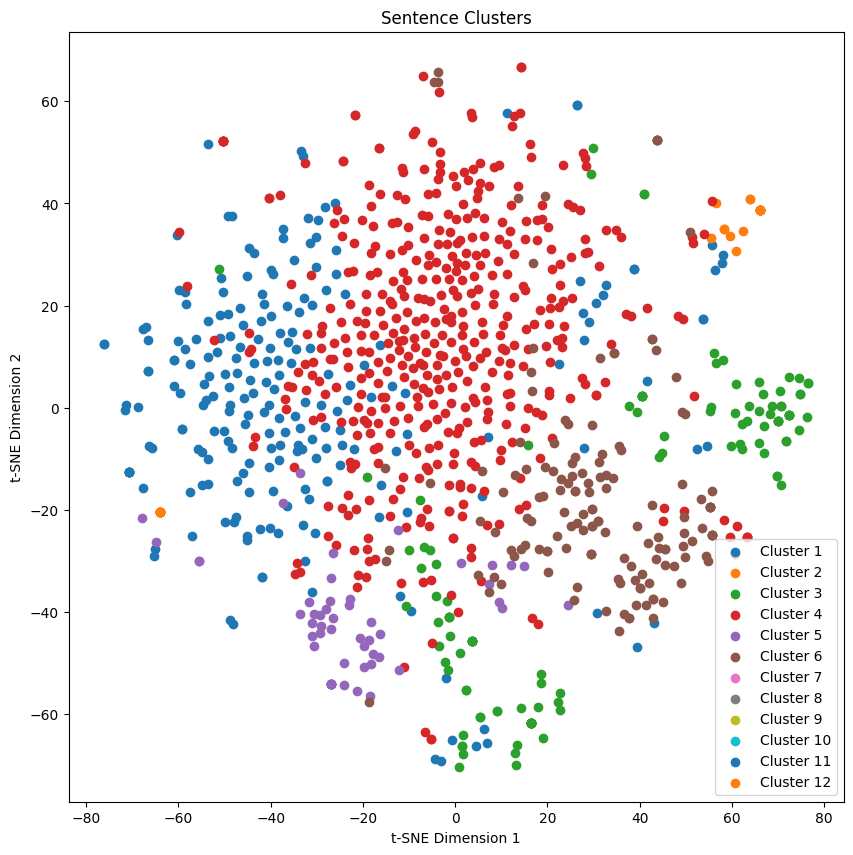

In [30]:
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    indices = labels == i
    plt.scatter(reduced_vectors_2d[indices, 0], reduced_vectors_2d[indices, 1], label=f'Cluster {i+1}')
plt.title('Sentence Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [31]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot using Plotly
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))

# Use Plotly IO to show the figure

In [46]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"


In [47]:
fig.show()

In [32]:
sentence_vectors=pd.DataFrame(sentence_vectors)

In [33]:
#export to csv filese
sentence_vectors.to_csv('glove_vector.csv', index=False)

In [136]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming reduced_vectors_2d, num_clusters, and labels are defined
# For demonstration, replace them with appropriate values or calculations

# Create a Plotly scatter plot
fig = go.Figure()

for i in range(13):
    indices = labels_12 == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(
    title='K-meam 12 Clusters',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# Use Plotly IO to show the figure
pio.show(fig)


In [37]:
sentence_vectors.to_csv('glove_vector_pos.csv', index=False)

In [36]:
roberta_neg=pd.read_csv("roberta_neg.csv")

In [44]:
# sentences_neg=np.array(roberta_neg['Review'])
sentences_neg=np.array(roberta_neg['Reviews'])

In [45]:
sentence_vectors = np.array([sentence_vector(sentence, glove_model) for sentence in sentences_neg])

In [46]:

# Perform t-SNE dimensionality reduction for 2D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value,random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

In [47]:
# Checking the dimensions
print(f"Length of labels: {len(labels)}")
print(f"Number of rows in reduced_vectors_2d: {reduced_vectors_2d.shape[0]}")


Length of labels: 1181
Number of rows in reduced_vectors_2d: 153


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Length of labels: 153
Number of rows in reduced_vectors_2d: 153


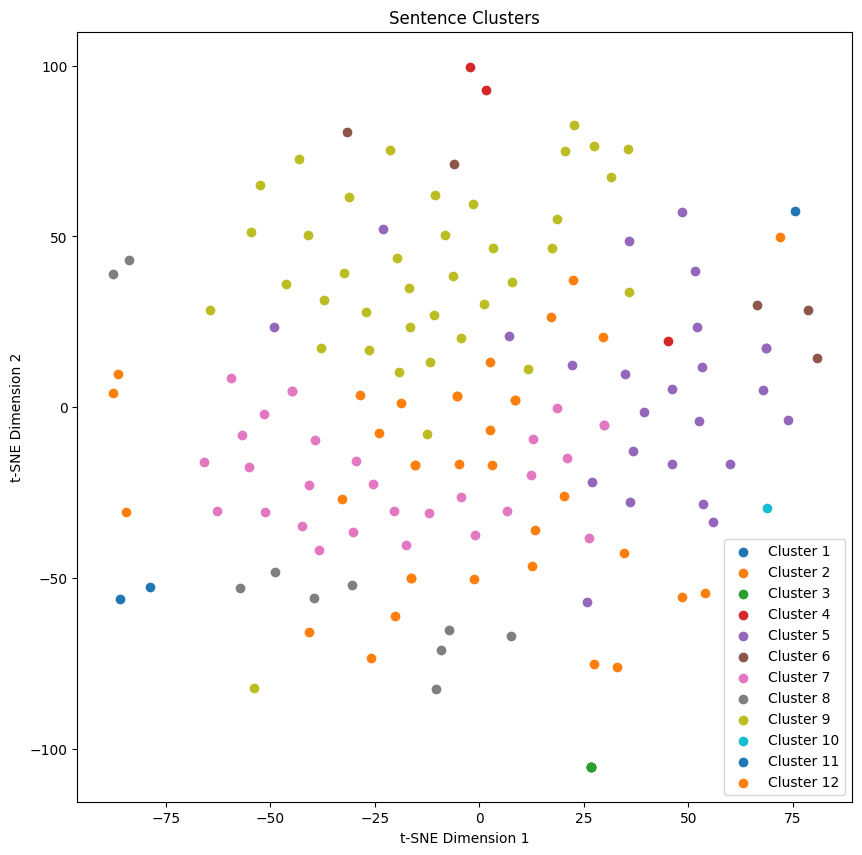

In [48]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is your initial dataset

# Step 1: Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(sentence_vectors)

# Step 2: t-SNE Reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

# Now check the dimensions again
print(f"Length of labels: {len(labels)}")
print(f"Number of rows in reduced_vectors_2d: {reduced_vectors_2d.shape[0]}")

# Plotting
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    indices = labels == i
    plt.scatter(reduced_vectors_2d[indices, 0], reduced_vectors_2d[indices, 1], label=f'Cluster {i+1}')
plt.title('Sentence Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [49]:
roberta_pos=pd.read_csv("roberta_pos.csv")

In [50]:
# sentences_pos=np.array(roberta_pos['Review'])
sentences_pos=np.array(roberta_pos['Reviews'])

In [51]:
sentence_vectors = np.array([sentence_vector(sentence, glove_model) for sentence in sentences_neg])

In [52]:

# Step 1: Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(sentence_vectors)

# Step 2: t-SNE Reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors_2d = tsne.fit_transform(sentence_vectors)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [58]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(sentence_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(sentence_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tweak these parameters as needed
cluster_labels = dbscan.fit_predict(sentence_vectors)

In [55]:
cluster_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Scaling the data
scaler = StandardScaler()
scaled_data_vectors = scaler.fit_transform(sentence_vectors)

# Applying DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=1.0, min_samples=3)  # Adjust these values based on your data
cluster_labels = dbscan.fit_predict(scaled_data_vectors)

# Check the distribution of labels
print(np.unique(cluster_labels, return_counts=True))

(array([-1,  0]), array([149,   4]))


In [57]:
cluster_labels

array([-1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# df


In [47]:
# Create DataFrame
df_gmm_6 = pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels_6_gmm
})

# Show the DataFrame
print(df_gmm_6)

                                               Sentence  Cluster
0                           settings perfect hair types        1
1                                         lots settings        1
2                                  heating element died        1
3                                    also diffuser stay        1
4                             wo stay flys see one work        0
...                                                 ...      ...
1176                                   top longer stays        0
1177                         unfortunately one lids fit        1
1178              cheap enough husband loses one wo cry        0
1179                                   economical price        5
1180  also way seal drinking hole car hit bump stop ...        0

[1181 rows x 2 columns]


In [48]:
# Create DataFrame
df_gmm_12 = pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels_12_gmm
})

# Show the DataFrame
print(df_gmm_12)

                                               Sentence  Cluster
0                           settings perfect hair types        3
1                                         lots settings        3
2                                  heating element died        7
3                                    also diffuser stay        7
4                             wo stay flys see one work        7
...                                                 ...      ...
1176                                   top longer stays        7
1177                         unfortunately one lids fit        3
1178              cheap enough husband loses one wo cry        7
1179                                   economical price        0
1180  also way seal drinking hole car hit bump stop ...        7

[1181 rows x 2 columns]


In [49]:
type(q)

pandas.core.series.Series

In [51]:
df_gmm_6

,Sentence,Cluster
0,settings perfect hair types,1
1,lots settings,1
2,heating element died,1
3,also diffuser stay,1
4,wo stay flys see one work,0
...,...,...
1176,top longer stays,0
1177,unfortunately one lids fit,1
1178,cheap enough husband loses one wo cry,0
1179,economical price,5


In [68]:
q=all_values

In [81]:
# add the aspect as per the sentenecs from amazon df to  df_nltk
df_=df_6.join(q)

In [82]:
df_

,Sentence,Cluster,Aspect
0,settings perfect hair types,4,adaptability
1,lots settings,4,adaptability
2,heating element died,4,durability
3,also diffuser stay,4,ease use
4,wo stay flys see one work,2,ease use
...,...,...,...
1176,top longer stays,2,performance
1177,unfortunately one lids fit,4,performance
1178,cheap enough husband loses one wo cry,2,price
1179,economical price,2,price


In [83]:
df_.Cluster.value_counts()

Cluster
4    467
2    438
0    142
3     70
5     42
1     22
Name: count, dtype: int64

In [84]:
clusters_=set(labels_6)

In [85]:
cluster_=list(clusters_)

In [86]:
print(type(cluster_))

<class 'list'>


In [87]:
cluster_

[0, 1, 2, 3, 4, 5]

In [88]:
feature_cluster_table = pd.DataFrame(index=unique_values, columns=cluster_)

In [89]:
aa=df_['Cluster']
aa=aa.explode().to_list()
print(set(aa))

{0, 1, 2, 3, 4, 5}


In [90]:
for value in unique_values:
    for cluster in labels_6:
        # Count occurrences of the value in this cluster
        count = df_[(df_['Aspect'] == value) & (df_['Cluster'] == cluster)].shape[0]
        feature_cluster_table.at[value, cluster] = count


# Display the table
print(feature_cluster_table)

                    0   1    2   3   4   5
adaptability        1   0   24   0  50   4
durability          2  21   83   1  91  19
ease use           54   0   18   0  28   0
ergonomics         29   0   13   2  27   3
interference        1   0   19   6  52   2
performance         2   1  135   4  92  11
use efficiency      4   0   23   0  23   0
aesthetics          5   0   45  56  38   2
ease reprocessing  34   0   16   1  42   1
ease storage        2   0    3   0   7   0
price               6   0   58   0  10   0
safety              2   0    1   0   7   0


In [92]:
df_12

,Sentence,Cluster
0,settings perfect hair types,2
1,lots settings,2
2,heating element died,2
3,also diffuser stay,3
4,wo stay flys see one work,3
...,...,...
1176,top longer stays,3
1177,unfortunately one lids fit,2
1178,cheap enough husband loses one wo cry,1
1179,economical price,10


In [93]:
# add the aspect as per the sentenecs from amazon df to  df_nltk
df_=df_12.join(q)

In [94]:
clusters_6=set(labels)

In [95]:
clusters_6

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [96]:
clusters_6=list(clusters_6)

In [97]:
clusters_6

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [98]:
feature_cluster_table_gmm_6 = pd.DataFrame(index=unique_values, columns=clusters_6)

In [99]:
feature_cluster_table_gmm_6

,0,1,2,3,4,5,6,7,8,9,10,11
adaptability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
durability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ease use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ergonomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
use efficiency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aesthetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ease reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ease storage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
for value in unique_values:
    for cluster in labels:
        # Count occurrences of the value in this cluster
        count = df_[(df_['Aspect'] == value) & (df_['Cluster'] == cluster)].shape[0]
        feature_cluster_table_gmm_6.at[value, cluster] = count

# Display the table
print(feature_cluster_table_gmm_6)

                   0   1   2   3   4   5  6   7   8   9   10  11
adaptability        0   6  38  26   0   0  0   1   6   1   0   1
durability          0   7  49  84   0  21  0   5  30   1  11   9
ease use            0   4  26  21   0   0  0   1   1  46   0   1
ergonomics         21  10  16  13   0   0  0   0   8   2   1   3
interference        0  15  39  19   0   0  0   0   0   0   0   7
performance         1  27  64  54   1   1  6  50   3   0  28  10
use efficiency      0   5  19  22   0   0  0   1   0   3   0   0
aesthetics          0  38  22  25  37   0  0   6   2   5   6   5
ease reprocessing   0   5  39  19   0   0  0   0   0  30   0   1
ease storage        0   2   3   4   0   0  0   1   1   1   0   0
price               0   5   5  19   0   0  0   1   1   2  41   0
safety              0   0   4   3   0   0  0   0   0   2   0   1


In [115]:
g=pd.read_csv('output.csv')
g_6=pd.read_csv('output_w_6.csv')

In [124]:
#drop the clsuster column from df_

df=df_.drop(columns=['Cluster'])

In [126]:
g=g.join(g_6)

In [127]:
g

,Sentence,Aspect,Unnamed: 0,cluster
0,settings perfect hair types,adaptability,1,5
1,lots settings,adaptability,2,5
2,heating element died,durability,3,5
3,also diffuser stay,ease use,4,2
4,wo stay flys see one work,ease use,5,2
...,...,...,...,...
1176,top longer stays,performance,1177,2
1177,unfortunately one lids fit,performance,1178,2
1178,cheap enough husband loses one wo cry,price,1179,2
1179,economical price,price,1180,5


In [128]:
for value in unique_values:
    for cluster in labels_6:
        # Count occurrences of the value in this cluster
        count = g[(g['Aspect'] == value) & (g['cluster'] == cluster)].shape[0]
        feature_cluster_table.at[value, cluster] = count


# Display the table
print(feature_cluster_table)

                   0   1    2  3  4    5
adaptability       0   3   43  1  0   32
durability         0   3  105  0  0  109
ease use           0   3   80  0  0   17
ergonomics         0  32   22  0  2   18
interference       0   7   48  1  0   23
performance        0  13   91  1  1  138
use efficiency     0   3   29  0  0   18
aesthetics         0  68   45  0  1   32
ease reprocessing  0   1   69  0  0   24
ease storage       0   2    5  0  0    5
price              0   0   23  0  0   51
safety             0   0    7  0  0    2
